# Week 1 - Normalization and data types

This first week is going to be a warm-up week where we conider different statistical tools data types.

Lets first import the libraries that we are going to need.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy as sp

## Exercise 1: Sample statistics and normalization

Let $X$ and $Y$ be two normal distributions of discrete variables with ($\mu_X=25,\sigma_X=5$) and ($\mu_Y=60,\sigma_Y=10$) that describe the *Age* and the *Weight* of a population. From $X$ and $Y$ sample the *Age* and the *Weight* of $n=500000$ individuals.

In [6]:
import numpy as np
import statistics
np.random.seed(1)
# TODO: use np.random.normal to initialize X and Y and round() function for discretization of the data
X = np.random.normal(25,5,500000)
Y = np.random.normal(60,10,500000)
X = X.round()
Y = Y.round()
print(X)
print(Y)

[33. 22. 22. ... 28. 17. 28.]
[67. 41. 55. ... 54. 72. 63.]


**a)** Find the mean, the median and the mode for $X,Y$. 

In [7]:
def count_dictionary(X):
    """
    Input: certain list of data   
    Output: counts of list elements as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2, 1:1, 2:3, 3:1}
    """
    # TODO: the calculation process of counts
    # We need counts also for later when we are computing the empirical PMF
    unique, counts = np.unique(X, return_counts=True)
    return dict(zip(unique, counts))


def compute_mean(X):
    """
    Input: certain list of data   
    Output: mean of this list   
    """
    # TODO: the calculation process of mean

    # print(type(X))
    return statistics.mean(X)


def compute_median(X):
    """
    Input: certain list of data   
    Output: median of this list
    Tip:Note: If the number of data values is odd, returns the exact middle value. 
    If the number of data values is even, returns the average of the two middle values.   
    """
    # TODO: the calculation process of median
    return statistics.median(X)

def compute_mode(X):
    """
    Input: certain list of data   
    Output: element with highest frequency 
    Hint: You can use function count_dictionary   
    """
    # TODO: the calculation process of mode
    return statistics.mode(X)


# dic = count_dictionary(X)
# print(dic)
x_mean = compute_mean(X)
x_median = compute_median(X)
x_mode = compute_mode(X)

print(f"Mean: {x_mean}\nMedian: {x_median}\nMode: {x_mode}\n" )

y_mean = compute_mean(Y)
y_median = compute_median(Y)
y_mode = compute_mode(Y)

print(f"Mean: {y_mean}\nMedian: {y_median}\nMode: {y_mode}" )

Mean: 25.005264
Median: 25.0
Mode: 25.0

Mean: 60.002704
Median: 60.0
Mode: 60.0


**b)** Using the sampled data of a) find their:
i) Probability Mass Function, ii) Expected Value and iii) Variance.  

In [8]:
# In order to make our life a lot easier, we will compute the probability of each element
# Because that will be useful for the next couple of tasks
# NOTE: We can reuse the dictionary from earlier (Task A)


def compute_pmf(X):
    """
    Input: certain list of data   
    Output: pmf as a dictionary 
    Example: Input: [0,1,0,2,3,2,2] => Output: {0:2/7, 1:1/7, 2:3/7, 3:1/7}
    Hint: you can use count_dictionary function from a)
    """
    # TODO: return pmf of X
    # print(len(X))
    dic = count_dictionary(X)
    for index in dic:
        dic[index] = dic[index]/len(X)
        # print(dic[index])
    return dic

def compute_ev(X):
    """
    Input: certain list of data   
    Output: expected value of X 
    Hint: you can use compute_pmf function 
    """
    # TODO: return the expected value of X
    dic = compute_pmf(X)
    ev =0
    for value in dic:
        ev += value * dic[value]
    # print(ev)
    return ev



def compute_variance(X):  
    """
    Input: certain list of data   
    Output: variance of X 
    Hint: you can use compute_pmf and compute_ev functions
    """
    # TODO: return the variance of X
    ev = compute_ev(X)
    result = 0
    for value in X:
        result += np.square(value - ev)
    result = result/(len(X)-1)
    return result


    
print("\nFor X:")
x_pmf = compute_pmf(X)
x_ev = compute_ev(X)
print(f'Expected Value of X is {x_ev}')
x_variance = compute_variance(X)
print(f'Variance of X is {x_variance}')

print("\nFor Y:")
y_pmf = compute_pmf(Y)
y_ev = compute_ev(Y)
print(f'Expected Value of Y is {y_ev}')
y_variance = compute_variance(Y)
print(f'Variance of Y is {y_variance}')



For X:
Expected Value of X is 25.005264
Variance of X is 25.05011039053714

For Y:
Expected Value of Y is 60.00270399999999
Variance of Y is 99.9903566691042


**c)** Suppose the only information we had is the sampled data $X$ and $Y$ for the *Age* and *Weight* respectively. Plot the distributions of $X$ and $Y$ and consider if the data seem to fit a normal distribution.  

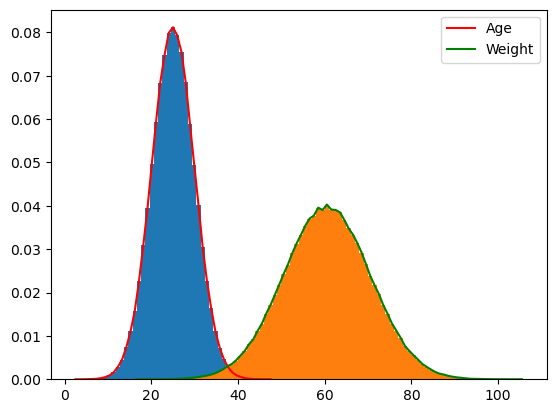

In [9]:
import scipy.stats as stats
# TODO: use plt.hist() and bins = len(np.unique()) in order to visualize the distribution
n,x,_ = plt.hist(X, bins = len(np.unique(X)), density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers, n, color = 'red', label = 'Age')

n,x,_ = plt.hist(Y, bins = len(np.unique(Y)), density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n, color = 'green', label = 'Weight')

plt.legend()
plt.show()

**d)** What is the probability of observing an age of 80 or higher?  

HINT: To calculate the probability we have to use the probability density function of normal distribution for $X$, in range $[80,\infty)$. Calculate the sample PDF and the expected PDF given that the distribution is normal with ($\mu_Y=60,\sigma_Y=10$). How close are these two values?

**Answer**

In [ ]:
 # TODO: find the probability that age is >80 (PDF), then find the expected PDF of the normal distribution (μ=60,σ=10) and compare the results


**e)** Find the 2-dimensional mean $\hat \mu$ and the covariance matrix $\widehat \Sigma$ for these two variables.  

In [12]:
# TODO: Compute 2-Dimensional mean is the vector (E[X], E[Y])
Z = np.c_[X, Y]
n, d = Z.shape

# mu = None
# cov = None

mu = np.mean(Z,axis=0, keepdims = True)
sum=0
evX = compute_ev(X)
evY = compute_ev(Y)
for i in range(0,500000):
    sum += (X[i]-evX)*(Y[i]-evY)
cov = sum/(len(X))
# TODO: The diagonal of the Covariance matrix must equal the initial covariance values of X and Y. Check your results.
print("Mean:\n", mu)
print("Cov: \n", cov)

Mean:
 [[25.005264 60.002704]]
Cov: 
 -0.055696233856001434


**f)** Normalize the data with _range normalization_ to the range $[0, 1]$  

**range normalization**:

$x_i^{'} = \frac{x_i-\min_i{x_i}}{\max_i{x_i} - \min_i{x_i}}$

In [13]:
# TODO: Compute the range normalization: (x_i - min)/(max - min)
min_z = Z.min(0, keepdims=True)
max_z = Z.max(0, keepdims=True)
Z_normalize = (Z - min_z) / (max_z - min_z)
print("Range normalized: \n", Z_normalize)

Range normalized: 
 [[0.67391304 0.56666667]
 [0.43478261 0.27777778]
 [0.43478261 0.43333333]
 ...
 [0.56521739 0.42222222]
 [0.32608696 0.62222222]
 [0.56521739 0.52222222]]


**g)** Normalize the data with _standard score normalization_ such that is has mean 0 and standard deviation 1.  

**z-score**:

$x_i^{'} = \frac{x_i-\hat{\mu}}{\hat{\sigma}}$

In [14]:
# TODO: #  Compute the standard score normalization:, x_i = (x_i - mu)/(sigma)
X_ssn = [(x - x_mean)/np.sqrt(x_variance) for x in X]
Y_ssn = [(y - np.mean(Y))/np.sqrt(y_variance) for y in Y]
print(np.mean(Y_ssn), np.std(Y_ssn))
print(np.mean(X_ssn), np.std(X_ssn))

-1.3424283906715573e-16 0.9999989999994656
-7.488409892175696e-17 0.9999989999992535


## Exercise 2: Robustness
Determine whether the following statements are true or false and explain why.
 - Mean is robust against outliers
 - Median is robust against outliers
 - Standard deviation is robust against outliers


**Answer:**

->false
true
false

## Exercise 3: More on robustness
Provide an informal definition of when a measure is robust. 

**Answer:**

->A statistic is robust if it is not affected by extreme
values

## Exercise 4: Independence analysis
Please explain what the idea of independence analysis is using contingency tables; for which kind of data is this particularly relevant? 


**Answer:**

->


## Exercise 5: Contingency table and $\chi^2$ statistics
In the table below,  assuming that $X_1$ is discretized into three bins, as follows: $[-2, -0.5]$, $[-0.5, 0.5]$, and $[0.5, 2]$.

![Table 3.11](graphics/3.11.png)

Answer the following questions

**a)** Construct the contingency table between the discretized $X_1$ and $X_2$ attributes, including the row and column counts.<br>
**b)** Construct the expected table between the discretized $X_1$ and $X_2$ attributes.<br>
**c)** Compute the $\chi^2$ statistic between them.<br>
**d)** Determine whether they are dependent or not at the 5% significance level. Use the $\chi^2$ critical values from Table 3.10.

![Table 3.10](graphics/3.10.png)

**Answer:**
**a)**

In [ ]:

X_1 = [0.3, -0.3, 0.44, -0.60, 0.40, 1.20, -0.12, -1.60, 1.60, -1.32]
X_2 = ["a", "b", "a", "a", "a", "b", "a", "b", "b", "a"]
# For sanity's sake, use code to bin X_1
# Converting everything to numbers allow us to index in them for easier computation
X_tmp = []
for x in X_1:
    if x >= -2 and x <= -0.5:
        X_tmp.append(0)
    elif x >= -0.5 and x <= 0.5:
            X_tmp.append(1)
    elif x > 0.5:
            X_tmp.append(2)
X_1 = X_tmp
X_2 = [0 if x == "a" else 1 for x in X_2]


# Our table looks like
## Bins: a b
## bin1
## bin2
## bin3
b1_row = [0, 0]
b2_row = [0, 0]
b3_row = [0, 0]
count_row = [0, 0, 0] # THIS ONE is for column counts
c_table = [b1_row, b2_row, b3_row]
# TODO: Compute contingency table c_table 







print(f"Our table before row counts: {c_table}")   


**Answer:**
**b)**

In [ ]:
# Now add row counts
# Remember these are reference variables, so modifying these
# will also modify our table

# TODO: Compute expected table
E = [[0, 0] for _ in range(3)]



print(f"The expected table is: {E}")

**Answer:**
**c)**



In [ ]:
# TODO: Compute Chi_squared
Chi_squared = 0
print(f"Chi_squared is: {Chi_squared}")


**Answer:**
**d)**

->

## Exercise 6: Working with Metrics

Consider the following situation: 

We know some distances between data points: $d(p_1,p_2)=1$, $d(p_1,p_3)=2$, $d(p_3, p_4)=1$. 
We also know that $d$ is a metric. 

1. What do we know about the remaining distances?
2. Do we need to compute further distances if we want to find the two points that are most similar to $p_1$? 
3. Can $p_4$ be closer to $p_2$ than $p_3$ is to $p_2$?






**Answers:**

    1. 

    2.


    3.

# Optional Exercises

## Exercise 7: Mean absolute deviation 
Define a measure of deviation called _mean absolute deviation_ for a random variable $X$ as follows:

$$
\frac{1}{n} \sum_{i=1}^n |x_i - \mu|
$$

Is this measure robust? Why or why not?

**Answer:**

->

## Exercise 8: Correlation

Consider the table below. Assume that both the attributes $X$ and $Y$ are numeric, and the
table represents the entire population. And we know that the correlation between $X$
and $Y$ is zero.
1. What can you infer about the values of $Y$? (Find a relationship between $a$, $b$ and $c$)
2. If we know there is a missing row, what can we infer about it?

|$X$ | $Y$ |
|:---:|:---:|
|$1$|$a$|
|$0$|$b$|
|$1$|$c$|
|$0$|$a$|
|$0$|$c$|

**Answer**

    1. 


    2.


# Exercise 9: 3-way contingency table

Consider the 3-way contingency table for attributes $X$,$Y$,$Z$ shown in the table below.
Compute the $\chi^2$ metric for the correlation between $Y$ and $Z$. Are they dependent
or independent at the 95% confidence level? See Table 3.10 above for $\chi^2$ values.

![Table 3.9](graphics/3.9.png)

In [ ]:
import scipy.stats.contingency
from scipy.stats import chi2_contingency
# TODO: Compute contingency using chi2_contingency
xy = np.array([[40,25],[40,35]])

# Exercise 10: Mixed data

Consider the "mixed" data given in the table below. Here $X_1$ is a numeric attribute and
$X_2$ is a categorical one. Assume that the domain of $X_2$ is given as $dom(X_2) = \{a, b\}$.
Answer the following questions.

**a)** What is the mean vector for this dataset?  
**b)** What is the covariance matrix?  

![Table 3.5](graphics/3.5.png)



In [ ]:
fine = np.array([[0.3,1,0],[-0.3,0,1],[0.44,1,0],[-0.6,1,0],[0.4,1,0],[1.2,0,1],[-0.12,1,0],[-0.16,0,1],[1.6,0,1],[-1.32,1,0]])
# TODO: compute the mean vector
mu = None
print("mean vector:\n", mu)

In [ ]:
n, d = fine.shape
# TODO: compute the covariance matrix
cov = None

print(f"Cov: {cov}")